In [1]:
import numpy as np
import pandas as pd
import statistics
from os import listdir
import pycaret
from pycaret.classification import *
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import re

In [3]:
#pip install --upgrade numpy==1.20 --user

Note: you may need to restart the kernel to use updated packages.


In [ ]:
def clustering(data, participants): 
    
    cost = []
    silhouette = []

    for i in range(2, participants):
        kmeans = KMeans(n_clusters = i, max_iter = 500, random_state = 0)
        kmeans.fit_predict(data)
        
        # Calculate Silhoutte Score
        score = silhouette_score(data, kmeans.labels_, metric='euclidean')
        silhouette.append(score)
    
        # Calculates squared error for the clustered points
        cost.append(kmeans.inertia_)    
        
    # Plot the cost against K values
    plt.plot(range(2, participants), cost, color ='g', linewidth ='3')
    plt.xlabel("Value of K")
    plt.ylabel("Squared Error (Cost)")
    plt.show() # clear the plot
    
    # Plot the Silhouette Score against K values
    plt.plot(range(2, participants), silhouette, color ='b', linewidth ='3')
    plt.xlabel("Value of K")
    plt.ylabel("Silhouette Score")
    plt.show() # clear the plot
    # the point of the elbow is the
    # most optimal value for choosing k

In [ ]:
def silhouette(data, clusters):
    kmeans = KMeans(n_clusters = clusters, max_iter = 500, random_state = 0)
    kmeans.fit_predict(data)
    
    #Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')#ax[q-1][mod])#, ax = ax[x%3][y%2]
    
    #Fit the visualizer
    visualizer.fit(data)
    #fig, ax = plt.subplots(3,2, figsize = (10,10))

## WESAD

In [7]:
wesad_dataset = pd.read_csv('Final_CSVs/wesad_new_with1.csv')

In [8]:
data_dir = 'WESAD/'

In [9]:
ids = []
age = []
gender = []
dominant_hand = []
coffee_today = []
coffee_hour = []
sports = []
smoker = []
smoke_hour = []
ill = []

for x in range(2, 18):
    #subjects 1 and 12 were not included in the published data
    if x != 12:
        f = open(data_dir + "S" + str(x) + '/S' + str(x) +"_readme.txt", "r")
        content = f.readlines()
        ids.append(x)
        age.append(int(re.findall("\d+", content[1])[0]))
        gender.append(re.findall("male|female", content[4])[0])
        dominant_hand.append(re.findall("right|left", content[5])[0])
        coffee_today.append(re.findall("YES|NO", content[8])[0])
        coffee_hour.append(re.findall("YES|NO", content[9])[0])
        sports.append(re.findall("YES|NO", content[10])[0])
        smoker.append(re.findall("YES|NO", content[11])[0])
        smoke_hour.append(re.findall("YES|NO", content[12])[0])
        ill.append(re.findall("YES|NO", content[13])[0])
        
        
        

In [10]:
wesad_extra = pd.DataFrame(
                            {'id': ids,
                             'age': age,
                             'gender': gender,
                             'dominant_hand': dominant_hand,
                             'coffee_today': coffee_today,
                             'coffee_hour': coffee_hour,
                             'sports': sports,
                             'smoker': smoker,
                             'smoke_hour': smoke_hour,
                             'ill': ill
                            })

In [11]:
wesad_extra

,id,age,gender,dominant_hand,coffee_today,coffee_hour,sports,smoker,smoke_hour,ill
0,2,27,male,right,NO,NO,NO,NO,NO,NO
1,3,27,male,right,NO,NO,NO,NO,NO,NO
2,4,25,male,right,NO,NO,NO,NO,NO,NO
3,5,35,male,right,YES,NO,NO,NO,NO,NO
4,6,27,male,right,YES,NO,NO,YES,NO,NO
5,7,28,male,right,NO,NO,YES,NO,NO,NO
6,8,27,female,left,YES,NO,YES,NO,NO,NO
7,9,26,male,right,NO,NO,NO,NO,NO,YES
8,10,28,male,right,NO,NO,NO,NO,NO,NO
9,11,26,female,right,YES,NO,NO,NO,NO,NO


In [12]:
# Drop unnecessary features

wesad_extra.drop(['smoke_hour'], axis=1, inplace=True)
wesad_extra.drop(['coffee_hour'], axis=1, inplace=True)

In [13]:
# Label Encoding categorical features

le = preprocessing.LabelEncoder()

wesad_extra['gender'] = le.fit_transform(wesad_extra['gender'])
wesad_extra['dominant_hand'] = le.fit_transform(wesad_extra['dominant_hand'])
wesad_extra['coffee_today'] = le.fit_transform(wesad_extra['coffee_today'])
wesad_extra['sports'] = le.fit_transform(wesad_extra['sports'])
wesad_extra['smoker'] = le.fit_transform(wesad_extra['smoker'])
wesad_extra['ill'] = le.fit_transform(wesad_extra['ill'])


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
wesad_extra[['age']] = scaler.fit_transform(wesad_extra[['age']])


In [15]:
wesad_dataset

,ACC110,ACC111,ACC1110,ACC1111,ACC1112,ACC1113,ACC1114,ACC1115,ACC1116,ACC1117,...,EDA11,EDA12,EDA13,TEMP10,TEMP11,TEMP12,TEMP13,id,dataset,stress
0,275.095822,257.706505,309.874457,335.958433,309.874457,214.233212,257.706505,344.653091,370.737067,335.958433,...,-2015.464571,-944.071437,-904.398252,5090.486004,5090.486004,4860.722884,4860.722884,11,Train,1.0
1,-627.837227,-680.813133,-866.228804,-707.301086,-548.373367,-548.373367,-521.885414,-574.861320,-601.349274,-627.837227,...,-4070.109389,-4059.534817,-4080.683961,5464.362128,5464.362128,5704.145133,5704.145133,4,Train,0.0
2,-495.397461,-495.397461,-495.397461,-521.885414,-495.397461,-495.397461,-495.397461,-495.397461,-495.397461,-495.397461,...,-4799.854061,-4810.428633,-4799.854061,11219.154268,11219.154268,11219.154268,11219.154268,4,Train,0.0
3,-312.637815,-336.365602,-348.229495,-360.093388,-300.773921,-336.365602,-348.229495,-348.229495,-383.821175,-371.957282,...,1496.828511,1513.949214,1502.533927,-5817.578991,-5817.578991,-5632.552542,-5632.552542,2,Train,1.0
4,-7.235882,-7.235882,-7.235882,-7.235882,-7.235882,-7.235882,-7.235882,-7.235882,-7.235882,-7.235882,...,-7228.750604,-7167.131140,-7167.131140,1150.312933,1049.554349,1049.554349,1049.554349,15,Train,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78761,161.917923,161.917923,161.917923,161.917923,161.917923,173.781816,161.917923,161.917923,161.917923,161.917923,...,-1082.687849,-1076.982432,-1082.687849,11204.854337,11204.854337,11204.854337,11204.854337,2,Test,0.0
78762,168.767337,168.767337,168.767337,168.767337,168.767337,168.767337,168.767337,168.767337,168.767337,168.767337,...,-3958.932937,-3969.283320,-3979.641795,6846.752098,6846.752098,6846.752098,6846.752098,16,Test,0.0
78763,-174.028735,-174.028735,-174.028735,-174.028735,-174.028735,-174.028735,-174.028735,-174.028735,-174.028735,-174.028735,...,-3702.069290,-3702.069290,-3702.069290,-410.537962,-410.537962,-410.537962,-410.537962,10,Test,0.0
78764,40.669509,48.001085,-61.972554,26.006357,-142.619890,-142.619890,55.332661,91.990541,187.301029,172.637877,...,3965.861145,3949.758752,4416.816285,-2681.315127,-2681.315127,-2681.315127,-2681.315127,8,Test,1.0


In [16]:
wesad_features = pd.DataFrame()
wesad_features['id'] = wesad_dataset['id']

In [17]:
acc_cols = [col for col in wesad_dataset.columns if 'ACC' in col]
bvp_cols = [col for col in wesad_dataset.columns if 'BVP' in col]
eda_cols = [col for col in wesad_dataset.columns if 'EDA' in col]
temp_cols = [col for col in wesad_dataset.columns if 'TEMP' in col]

In [18]:
wesad_features["ACC"] = wesad_dataset[acc_cols].apply(lambda x: statistics.mean(x), axis =1)
wesad_features["BVP"] = wesad_dataset[bvp_cols].apply(lambda x: statistics.mean(x), axis =1)
wesad_features["EDA"] = wesad_dataset[eda_cols].apply(lambda x: statistics.mean(x), axis =1)
wesad_features["TEMP"] = wesad_dataset[temp_cols].apply(lambda x: statistics.mean(x), axis =1)

In [19]:
wesad_features

,id,ACC,BVP,EDA,TEMP
0,11,-11.378692,20.311753,-1466.543609,4975.604444
1,4,-347.879380,15.940493,-4070.109389,5584.253630
2,4,-348.862397,-19.024111,-4799.854061,11219.154268
3,2,-701.771327,0.997293,1495.401043,-5725.065767
4,15,203.402497,1.623619,-7197.940872,1074.743995
...,...,...,...,...,...
78761,2,376.430602,0.419619,-1081.261495,11204.854337
78762,16,407.115692,-0.705260,-3969.285343,6846.752098
78763,10,475.350796,1.908681,-3700.304886,-410.537962
78764,8,78.582199,22.516438,4058.468791,-2681.315127


In [20]:
wesad_mean = wesad_features.groupby('id', as_index = False, group_keys = True).mean()
wesad_mean.columns = map(lambda x: x + '_mean', wesad_mean.columns)
wesad_mean = wesad_mean.rename({'id_mean': 'id'}, axis='columns')
wesad_mean

wesad_min = wesad_features.groupby('id', as_index = False, group_keys = True).min()
wesad_min.columns = map(lambda x: x + '_min', wesad_min.columns)
wesad_min = wesad_min.rename({'id_min': 'id'}, axis='columns')
wesad_min

wesad_std = wesad_features.groupby('id', as_index = False, group_keys = True).std()
wesad_std.columns = map(lambda x: x + '_std', wesad_std.columns)
wesad_std = wesad_std.rename({'id_std': 'id'}, axis='columns')
wesad_std

,id,ACC_std,BVP_std,EDA_std,TEMP_std
0,2,502.045422,8.621274,1565.524486,9833.841562
1,3,348.669329,13.589607,1619.742066,13895.165208
2,4,370.881501,21.902177,7910.193229,13123.172200
3,5,697.334405,23.424893,3226.998622,7628.694799
4,6,237.185010,18.639532,34943.846434,13295.477323
5,7,75.455974,8.603391,7464.238351,26954.510152
6,8,476.180921,20.460376,2823.491721,6843.442197
7,9,278.579577,18.516263,3019.595459,23193.261691
8,10,529.447035,13.188113,5117.328689,3924.886808
9,11,231.055206,38.583819,7234.572573,13222.537402


In [21]:
scaler = MinMaxScaler()

wesad_mean.loc[:, wesad_mean.columns!='id'] = scaler.fit_transform(wesad_mean.loc[:, wesad_mean.columns!='id'])
wesad_min.loc[:, wesad_min.columns!='id'] = scaler.fit_transform(wesad_min.loc[:, wesad_min.columns!='id'])
wesad_std.loc[:, wesad_std.columns!='id'] = scaler.fit_transform(wesad_std.loc[:, wesad_std.columns!='id'])

In [22]:
wesad_all_grouped = pd.merge(wesad_extra, wesad_mean, on='id')
wesad_all_grouped = pd.merge(wesad_min, wesad_all_grouped, on='id')
wesad_all_grouped = pd.merge(wesad_std, wesad_all_grouped, on='id')

In [23]:
wesad_all_grouped

,id,ACC_std,BVP_std,EDA_std,TEMP_std,ACC_min,BVP_min,EDA_min,TEMP_min,age,gender,dominant_hand,coffee_today,sports,smoker,ill,ACC_mean,BVP_mean,EDA_mean,TEMP_mean
0,2,0.571991,0.000596,0.035691,0.326338,0.592250,1.000000,0.975537,0.756190,0.272727,1,1,0,0,0,0,0.716677,0.613435,0.647604,0.535588
1,3,0.366337,0.166316,0.037258,0.486143,0.811092,0.446881,0.981260,0.689573,0.272727,1,1,0,0,0,0,0.559606,0.650124,0.616729,0.752105
2,4,0.396120,0.443582,0.218990,0.455767,0.849084,0.834331,0.872678,0.588313,0.090909,1,1,0,0,0,0,0.355065,0.234184,0.654142,0.260498
3,5,0.833844,0.494373,0.083692,0.239571,0.000000,0.576034,0.932509,0.762333,1.000000,1,1,1,0,0,0,0.104599,0.476529,0.811299,0.521898
4,6,0.216854,0.334756,1.000000,0.462546,0.320005,0.669746,0.000000,0.654837,0.272727,1,1,1,0,1,0,0.784146,0.576738,0.929398,0.586744
5,7,0.000000,0.000000,0.206107,1.000000,1.000000,0.997203,0.723089,0.000000,0.363636,1,1,0,1,0,0,0.470799,0.442501,0.000000,0.645543
6,8,0.537311,0.395491,0.072034,0.208673,0.620727,0.658468,0.943927,0.870573,0.272727,0,0,1,1,0,0,0.314885,0.520319,0.505342,0.503070
7,9,0.272358,0.330645,0.077700,0.852003,0.156006,0.799970,0.935449,0.436242,0.181818,1,1,0,0,0,1,0.000000,0.710407,0.690369,1.000000
8,10,0.608732,0.152924,0.138304,0.093834,0.367236,0.913051,0.905989,0.911635,0.363636,1,1,0,0,0,0,0.236879,0.600611,0.685666,0.479416
9,11,0.208635,1.000000,0.199472,0.459676,0.716657,0.000000,0.676996,0.755713,0.181818,0,1,1,0,0,0,0.244917,0.533140,0.156897,0.506410


In [24]:
ids = wesad_all_grouped["id"]
wesad_all_grouped = wesad_all_grouped.drop("id", axis = 1)

## Hard Clustering

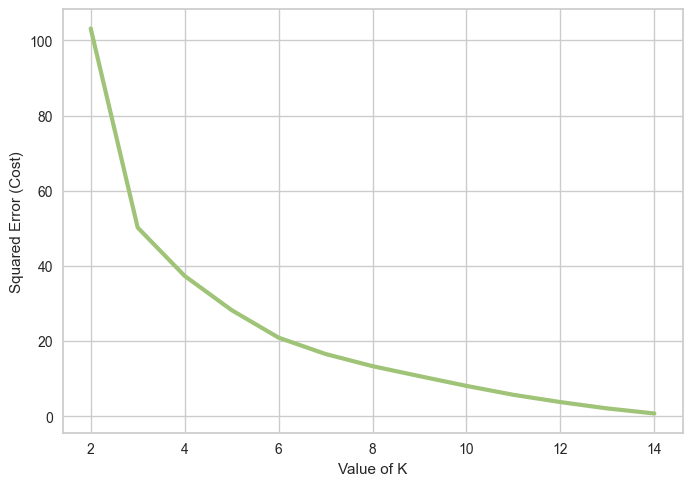

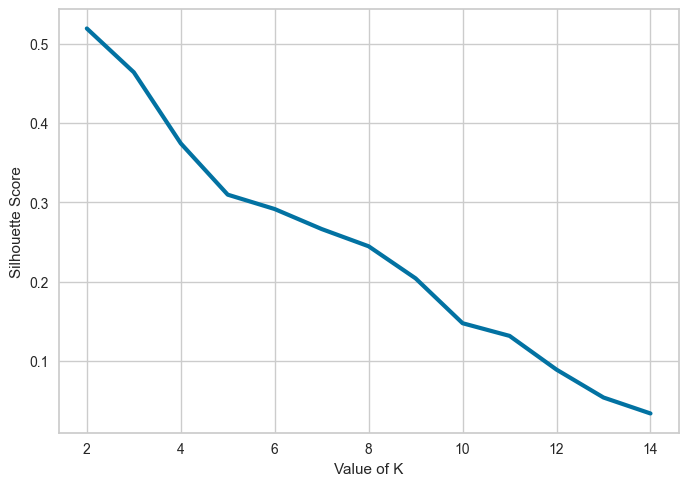

In [34]:
clustering(wesad_all_grouped, 15)

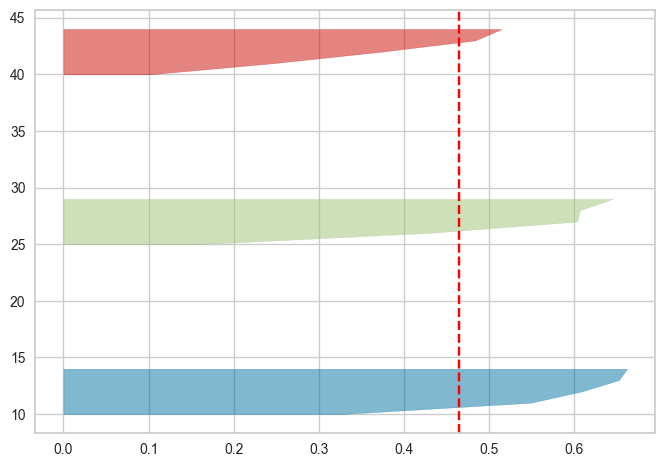

In [35]:
silhouette(wesad_all_grouped, 3)

In [36]:
kmeans = KMeans(n_clusters = 3, max_iter = 500, random_state = 0)
y = kmeans.fit_predict(wesad_all_grouped)
y = pd.DataFrame(y, columns=["Cluster"])
y.value_counts()

Cluster
0          5
1          5
2          5
dtype: int64

####  Visualization with t-SNE

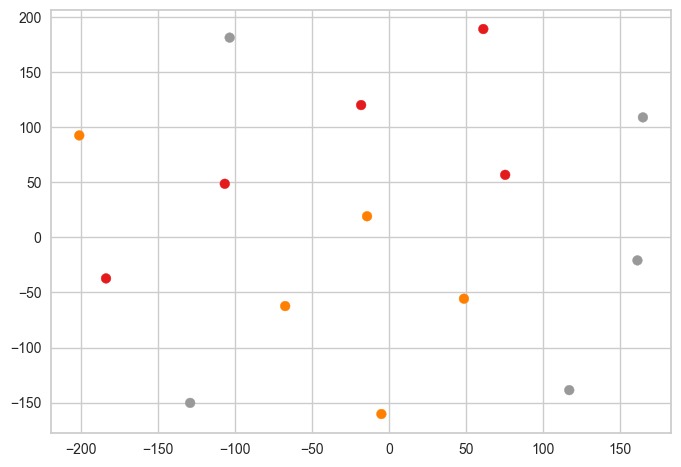

In [42]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

kmeans = KMeans(n_clusters = 3, max_iter = 500, random_state = 0)
model = kmeans.fit(wesad_all_grouped)
tsne = TSNE().fit_transform(wesad_all_grouped)
plt.scatter(x = tsne[:, 0], y = tsne[:, 1], c=model.labels_, cmap='Set1')

In [40]:
clusters = pd.concat([ids, y], axis=1)
clusters

,id,Cluster
0,2,1
1,3,1
2,4,1
3,5,1
4,6,1
5,7,2
6,8,2
7,9,2
8,10,2
9,11,2


In [38]:
wesad_grouped_all = pd.merge(wesad_dataset, clusters, on = "id")
wesad_grouped_all

,ACC110,ACC111,ACC1110,ACC1111,ACC1112,ACC1113,ACC1114,ACC1115,ACC1116,ACC1117,ACC1118,ACC1119,ACC112,ACC1120,ACC1121,ACC1122,ACC1123,ACC1124,ACC1125,ACC1126,ACC1127,ACC1128,ACC1129,ACC113,ACC1130,ACC1131,ACC114,ACC115,ACC116,ACC117,ACC118,ACC119,ACC210,ACC211,ACC2110,ACC2111,ACC2112,ACC2113,ACC2114,ACC2115,ACC2116,ACC2117,ACC2118,ACC2119,ACC212,ACC2120,ACC2121,ACC2122,ACC2123,ACC2124,ACC2125,ACC2126,ACC2127,ACC2128,ACC2129,ACC213,ACC2130,ACC2131,ACC214,ACC215,ACC216,ACC217,ACC218,ACC219,ACC310,ACC311,ACC3110,ACC3111,ACC3112,ACC3113,ACC3114,ACC3115,ACC3116,ACC3117,ACC3118,ACC3119,ACC312,ACC3120,ACC3121,ACC3122,ACC3123,ACC3124,ACC3125,ACC3126,ACC3127,ACC3128,ACC3129,ACC313,ACC3130,ACC3131,ACC314,ACC315,ACC316,ACC317,ACC318,ACC319,BVP10,BVP11,BVP110,BVP111,BVP112,BVP113,BVP114,BVP115,BVP116,BVP117,BVP118,BVP119,BVP12,BVP120,BVP121,BVP122,BVP123,BVP124,BVP125,BVP126,BVP127,BVP128,BVP129,BVP13,BVP130,BVP131,BVP132,BVP133,BVP134,BVP135,BVP136,BVP137,BVP138,BVP139,BVP14,BVP140,BVP141,BVP142,BVP143,BVP144,BVP145,BVP146,BVP147,BVP148,BVP149,BVP15,BVP150,BVP151,BVP152,BVP153,BVP154,BVP155,BVP156,BVP157,BVP158,BVP159,BVP16,BVP160,BVP161,BVP162,BVP163,BVP17,BVP18,BVP19,EDA10,EDA11,EDA12,EDA13,TEMP10,TEMP11,TEMP12,TEMP13,id,dataset,stress,Cluster
0,275.095822,257.706505,309.874457,335.958433,309.874457,214.233212,257.706505,344.653091,370.737067,335.958433,318.569115,301.179798,249.011847,266.401164,266.401164,266.401164,309.874457,327.263774,335.958433,283.790481,301.179798,266.401164,196.843895,266.401164,379.431726,-55.301204,283.790481,283.790481,275.095822,275.095822,301.179798,309.874457,252.378126,293.021173,333.664220,333.664220,374.307267,252.378126,414.950315,414.950315,374.307267,374.307267,293.021173,211.735079,293.021173,293.021173,252.378126,293.021173,171.092032,130.448984,171.092032,171.092032,171.092032,414.950315,414.950315,333.664220,1065.239070,1024.596022,374.307267,374.307267,252.378126,211.735079,293.021173,333.664220,-649.907797,-649.907797,-661.972758,-698.167639,-782.622362,-601.647955,-613.712916,-698.167639,-661.972758,-674.037718,-746.427481,-698.167639,-674.037718,-674.037718,-746.427481,-722.297560,-649.907797,-625.777876,-613.712916,-686.102678,-722.297560,-734.362520,-698.167639,-649.907797,339.418959,-927.401887,-613.712916,-625.777876,-770.557401,-794.687322,-674.037718,-674.037718,-1.033617,10.019713,38.208016,40.427932,42.624723,44.266536,45.168377,45.492114,45.422742,45.122128,44.590274,43.642185,19.454354,42.139117,40.011698,37.329300,34.323164,31.132035,28.033403,25.096640,22.391117,19.801216,17.234438,26.992817,14.667661,12.147132,9.811596,7.892294,6.435474,5.394888,4.493048,3.568083,2.550622,1.648781,32.288241,1.116926,1.209423,1.949394,3.244345,4.839910,6.458598,7.961666,9.187244,10.042837,10.435947,35.201880,10.412823,10.158457,10.019713,10.297202,11.152795,12.424621,13.765820,14.783282,15.268888,15.153268,36.173093,14.552040,13.580827,12.332125,10.852181,36.057473,35.941852,36.589328,-2002.240176,-2015.464571,-944.071437,-904.398252,5090.486004,5090.486004,4860.722884,4860.722884,11,Train,1.0,2
1,-3.133252,-3.133252,5.561406,5.561406,5.561406,-3.133252,5.561406,5.561406,-3.133252,5.561406,-3.133252,-3.133252,-11.827911,-11.827911,-3.133252,-3.133252,-11.827911,-3.133252,-3.133252,-3.133252,-3.133252,-3.133252,-11.827911,5.561406,-11.827911,-11.827911,-3.133252,-11.827911,5.561406,5.561406,-3.133252,-3.133252,252.378126,252.378126,293.021173,252.378126,252.378126,293.021173,333.664220,293.021173,333.664220,293.021173,252.378126,252.378126,252.378126,252.378126,252.378126,252.378126,252.378126,252.378126,252.378126,293.021173,252.378126,293.021173,252.378126,211.735079,252.378126,252.378126,171.092032,211.735079,171.092032,211.735079,252.378126,252.378126,-420.673549,-420.673549,-408.608588,-408.608588,-420.673549,-420.673549,-420.673549,-432.738509,-432.738509,-420.673549,-420.673549,-432.738509,-408.608588,-432.738509,-396.543628,-396.543628,-420.673549,-396.543628,-396.543628,-396.543628,-384.

In [39]:
wesad_grouped_all.to_csv("Final_CSVs/wesad_clusters_3.csv", index = False)

In [40]:
# Drop 'dataset' to run pycaret tests based on "Cluster".

wesad_grouped_all = wesad_grouped_all.drop('dataset', axis = 1)
wesad_grouped_all

,ACC110,ACC111,ACC1110,ACC1111,ACC1112,ACC1113,ACC1114,ACC1115,ACC1116,ACC1117,ACC1118,ACC1119,ACC112,ACC1120,ACC1121,ACC1122,ACC1123,ACC1124,ACC1125,ACC1126,ACC1127,ACC1128,ACC1129,ACC113,ACC1130,ACC1131,ACC114,ACC115,ACC116,ACC117,ACC118,ACC119,ACC210,ACC211,ACC2110,ACC2111,ACC2112,ACC2113,ACC2114,ACC2115,ACC2116,ACC2117,ACC2118,ACC2119,ACC212,ACC2120,ACC2121,ACC2122,ACC2123,ACC2124,ACC2125,ACC2126,ACC2127,ACC2128,ACC2129,ACC213,ACC2130,ACC2131,ACC214,ACC215,ACC216,ACC217,ACC218,ACC219,ACC310,ACC311,ACC3110,ACC3111,ACC3112,ACC3113,ACC3114,ACC3115,ACC3116,ACC3117,ACC3118,ACC3119,ACC312,ACC3120,ACC3121,ACC3122,ACC3123,ACC3124,ACC3125,ACC3126,ACC3127,ACC3128,ACC3129,ACC313,ACC3130,ACC3131,ACC314,ACC315,ACC316,ACC317,ACC318,ACC319,BVP10,BVP11,BVP110,BVP111,BVP112,BVP113,BVP114,BVP115,BVP116,BVP117,BVP118,BVP119,BVP12,BVP120,BVP121,BVP122,BVP123,BVP124,BVP125,BVP126,BVP127,BVP128,BVP129,BVP13,BVP130,BVP131,BVP132,BVP133,BVP134,BVP135,BVP136,BVP137,BVP138,BVP139,BVP14,BVP140,BVP141,BVP142,BVP143,BVP144,BVP145,BVP146,BVP147,BVP148,BVP149,BVP15,BVP150,BVP151,BVP152,BVP153,BVP154,BVP155,BVP156,BVP157,BVP158,BVP159,BVP16,BVP160,BVP161,BVP162,BVP163,BVP17,BVP18,BVP19,EDA10,EDA11,EDA12,EDA13,TEMP10,TEMP11,TEMP12,TEMP13,id,stress,Cluster
0,275.095822,257.706505,309.874457,335.958433,309.874457,214.233212,257.706505,344.653091,370.737067,335.958433,318.569115,301.179798,249.011847,266.401164,266.401164,266.401164,309.874457,327.263774,335.958433,283.790481,301.179798,266.401164,196.843895,266.401164,379.431726,-55.301204,283.790481,283.790481,275.095822,275.095822,301.179798,309.874457,252.378126,293.021173,333.664220,333.664220,374.307267,252.378126,414.950315,414.950315,374.307267,374.307267,293.021173,211.735079,293.021173,293.021173,252.378126,293.021173,171.092032,130.448984,171.092032,171.092032,171.092032,414.950315,414.950315,333.664220,1065.239070,1024.596022,374.307267,374.307267,252.378126,211.735079,293.021173,333.664220,-649.907797,-649.907797,-661.972758,-698.167639,-782.622362,-601.647955,-613.712916,-698.167639,-661.972758,-674.037718,-746.427481,-698.167639,-674.037718,-674.037718,-746.427481,-722.297560,-649.907797,-625.777876,-613.712916,-686.102678,-722.297560,-734.362520,-698.167639,-649.907797,339.418959,-927.401887,-613.712916,-625.777876,-770.557401,-794.687322,-674.037718,-674.037718,-1.033617,10.019713,38.208016,40.427932,42.624723,44.266536,45.168377,45.492114,45.422742,45.122128,44.590274,43.642185,19.454354,42.139117,40.011698,37.329300,34.323164,31.132035,28.033403,25.096640,22.391117,19.801216,17.234438,26.992817,14.667661,12.147132,9.811596,7.892294,6.435474,5.394888,4.493048,3.568083,2.550622,1.648781,32.288241,1.116926,1.209423,1.949394,3.244345,4.839910,6.458598,7.961666,9.187244,10.042837,10.435947,35.201880,10.412823,10.158457,10.019713,10.297202,11.152795,12.424621,13.765820,14.783282,15.268888,15.153268,36.173093,14.552040,13.580827,12.332125,10.852181,36.057473,35.941852,36.589328,-2002.240176,-2015.464571,-944.071437,-904.398252,5090.486004,5090.486004,4860.722884,4860.722884,11,1.0,2
1,-3.133252,-3.133252,5.561406,5.561406,5.561406,-3.133252,5.561406,5.561406,-3.133252,5.561406,-3.133252,-3.133252,-11.827911,-11.827911,-3.133252,-3.133252,-11.827911,-3.133252,-3.133252,-3.133252,-3.133252,-3.133252,-11.827911,5.561406,-11.827911,-11.827911,-3.133252,-11.827911,5.561406,5.561406,-3.133252,-3.133252,252.378126,252.378126,293.021173,252.378126,252.378126,293.021173,333.664220,293.021173,333.664220,293.021173,252.378126,252.378126,252.378126,252.378126,252.378126,252.378126,252.378126,252.378126,252.378126,293.021173,252.378126,293.021173,252.378126,211.735079,252.378126,252.378126,171.092032,211.735079,171.092032,211.735079,252.378126,252.378126,-420.673549,-420.673549,-408.608588,-408.608588,-420.673549,-420.673549,-420.673549,-432.738509,-432.738509,-420.673549,-420.673549,-432.738509,-408.608588,-432.738509,-396.543628,-396.543628,-420.673549,-396.543628,-396.543628,-396.543628,-384.478667,-384.47

In [41]:
unique_participants = wesad_grouped_all["Cluster"].unique()
wesad_group = wesad_grouped_all.groupby('Cluster')

In [42]:
accuracies = []
precision = []
recall = []
f1scores = []

for participant in unique_participants:
    print("Participant: ",participant)
    part_df = wesad_group.get_group(participant)
    grid = setup(data=part_df, target='stress', fix_imbalance = True, html=False, silent=True, verbose=False) #fix_imbalance = True,
    best = compare_models(sort="F1")
    accuracies.append(pull()['Accuracy'][0])
    precision.append(pull()['Prec.'][0])
    recall.append(pull()['Recall'][0])
    f1scores.append(pull()['F1'][0])
    print(best)

Participant:  2


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8976,0.9639,0.8879,0.7553,0.8161,0.7458,0.7506,3.739


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9954,0.9962,0.9873,0.9947,0.9910,0.9879,0.9879,0.614
lr,Logistic Regression,0.8976,0.9639,0.8879,0.7553,0.8161,0.7458,0.7506,3.739


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9954,0.9962,0.9873,0.9947,0.9910,0.9879,0.9879,0.614
lr,Logistic Regression,0.8976,0.9639,0.8879,0.7553,0.8161,0.7458,0.7506,3.739
nb,Naive Bayes,0.7906,0.8059,0.7033,0.5746,0.6321,0.4880,0.4931,0.172


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9954,0.9962,0.9873,0.9947,0.9910,0.9879,0.9879,0.614
dt,Decision Tree Classifier,0.9917,0.9895,0.9850,0.9825,0.9838,0.9782,0.9782,0.334
lr,Logistic Regression,0.8976,0.9639,0.8879,0.7553,0.8161,0.7458,0.7506,3.739
nb,Naive Bayes,0.7906,0.8059,0.7033,0.5746,0.6321,0.4880,0.4931,0.172


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9954,0.9962,0.9873,0.9947,0.9910,0.9879,0.9879,0.614
dt,Decision Tree Classifier,0.9917,0.9895,0.9850,0.9825,0.9838,0.9782,0.9782,0.334
lr,Logistic Regression,0.8976,0.9639,0.8879,0.7553,0.8161,0.7458,0.7506,3.739
svm,SVM - Linear Kernel,0.8818,0.0000,0.9403,0.7076,0.8049,0.7232,0.7407,0.446
nb,Naive Bayes,0.7906,0.8059,0.7033,0.5746,0.6321,0.4880,0.4931,0.172


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9954,0.9962,0.9873,0.9947,0.9910,0.9879,0.9879,0.614
dt,Decision Tree Classifier,0.9917,0.9895,0.9850,0.9825,0.9838,0.9782,0.9782,0.334
ridge,Ridge Classifier,0.9086,0.0000,0.9267,0.7657,0.8385,0.7755,0.7825,0.167
lr,Logistic Regression,0.8976,0.9639,0.8879,0.7553,0.8161,0.7458,0.7506,3.739
svm,SVM - Linear Kernel,0.8818,0.0000,0.9403,0.7076,0.8049,0.7232,0.7407,0.446
nb,Naive Bayes,0.7906,0.8059,0.7033,0.5746,0.6321,0.4880,0.4931,0.172


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9954,0.9962,0.9873,0.9947,0.9910,0.9879,0.9879,0.614
rf,Random Forest Classifier,0.9948,0.9997,0.9926,0.9870,0.9898,0.9863,0.9863,1.392
dt,Decision Tree Classifier,0.9917,0.9895,0.9850,0.9825,0.9838,0.9782,0.9782,0.334
ridge,Ridge Classifier,0.9086,0.0000,0.9267,0.7657,0.8385,0.7755,0.7825,0.167
lr,Logistic Regression,0.8976,0.9639,0.8879,0.7553,0.8161,0.7458,0.7506,3.739
svm,SVM - Linear Kernel,0.8818,0.0000,0.9403,0.7076,0.8049,0.7232,0.7407,0.446
nb,Naive Bayes,0.7906,0.8059,0.7033,0.5746,0.6321,0.4880,0.4931,0.172


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9954,0.9962,0.9873,0.9947,0.9910,0.9879,0.9879,0.614
rf,Random Forest Classifier,0.9948,0.9997,0.9926,0.9870,0.9898,0.9863,0.9863,1.392
dt,Decision Tree Classifier,0.9917,0.9895,0.9850,0.9825,0.9838,0.9782,0.9782,0.334
ridge,Ridge Classifier,0.9086,0.0000,0.9267,0.7657,0.8385,0.7755,0.7825,0.167
lr,Logistic Regression,0.8976,0.9639,0.8879,0.7553,0.8161,0.7458,0.7506,3.739
svm,SVM - Linear Kernel,0.8818,0.0000,0.9403,0.7076,0.8049,0.7232,0.7407,0.446
nb,Naive Bayes,0.7906,0.8059,0.7033,0.5746,0.6321,0.4880,0.4931,0.172
qda,Quadratic Discriminant Analysis,0.7779,0.9331,0.2648,0.6683,0.3789,0.2732,0.3169,0.582


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9954,0.9962,0.9873,0.9947,0.9910,0.9879,0.9879,0.614
rf,Random Forest Classifier,0.9948,0.9997,0.9926,0.9870,0.9898,0.9863,0.9863,1.392
dt,Decision Tree Classifier,0.9917,0.9895,0.9850,0.9825,0.9838,0.9782,0.9782,0.334
ada,Ada Boost Classifier,0.9736,0.9970,0.9702,0.9298,0.9495,0.9316,0.9321,1.869
ridge,Ridge Classifier,0.9086,0.0000,0.9267,0.7657,0.8385,0.7755,0.7825,0.167
lr,Logistic Regression,0.8976,0.9639,0.8879,0.7553,0.8161,0.7458,0.7506,3.739
svm,SVM - Linear Kernel,0.8818,0.0000,0.9403,0.7076,0.8049,0.7232,0.7407,0.446
nb,Naive Bayes,0.7906,0.8059,0.7033,0.5746,0.6321,0.4880,0.4931,0.172
qda,Quadratic Discriminant Analysis,0.7779,0.9331,0.2648,0.6683,0.3789,0.2732,0.3169,0.582


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9954,0.9962,0.9873,0.9947,0.9910,0.9879,0.9879,0.614
rf,Random Forest Classifier,0.9948,0.9997,0.9926,0.9870,0.9898,0.9863,0.9863,1.392
gbc,Gradient Boosting Classifier,0.9927,0.9993,0.9913,0.9802,0.9857,0.9808,0.9808,7.972
dt,Decision Tree Classifier,0.9917,0.9895,0.9850,0.9825,0.9838,0.9782,0.9782,0.334
ada,Ada Boost Classifier,0.9736,0.9970,0.9702,0.9298,0.9495,0.9316,0.9321,1.869
ridge,Ridge Classifier,0.9086,0.0000,0.9267,0.7657,0.8385,0.7755,0.7825,0.167
lr,Logistic Regression,0.8976,0.9639,0.8879,0.7553,0.8161,0.7458,0.7506,3.739
svm,SVM - Linear Kernel,0.8818,0.0000,0.9403,0.7076,0.8049,0.7232,0.7407,0.446
nb,Naive Bayes,0.7906,0.8059,0.7033,0.5746,0.6321,0.4880,0.4931,0.172
qda,Quadratic Discriminant Analysis,0.7779,0.9331,0.2648,0.6683,0.3789,0.2732,0.3169,0.582


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9954,0.9962,0.9873,0.9947,0.9910,0.9879,0.9879,0.614
rf,Random Forest Classifier,0.9948,0.9997,0.9926,0.9870,0.9898,0.9863,0.9863,1.392
gbc,Gradient Boosting Classifier,0.9927,0.9993,0.9913,0.9802,0.9857,0.9808,0.9808,7.972
dt,Decision Tree Classifier,0.9917,0.9895,0.9850,0.9825,0.9838,0.9782,0.9782,0.334
ada,Ada Boost Classifier,0.9736,0.9970,0.9702,0.9298,0.9495,0.9316,0.9321,1.869
ridge,Ridge Classifier,0.9086,0.0000,0.9267,0.7657,0.8385,0.7755,0.7825,0.167
lda,Linear Discriminant Analysis,0.9083,0.9672,0.9261,0.7653,0.8380,0.7749,0.7818,0.742
lr,Logistic Regression,0.8976,0.9639,0.8879,0.7553,0.8161,0.7458,0.7506,3.739
svm,SVM - Linear Kernel,0.8818,0.0000,0.9403,0.7076,0.8049,0.7232,0.7407,0.446
nb,Naive Bayes,0.7906,0.8059,0.7033,0.5746,0.6321,0.4880,0.4931,0.172


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9954,0.9962,0.9873,0.9947,0.9910,0.9879,0.9879,0.614
rf,Random Forest Classifier,0.9948,0.9997,0.9926,0.9870,0.9898,0.9863,0.9863,1.392
et,Extra Trees Classifier,0.9940,0.9998,0.9930,0.9837,0.9883,0.9843,0.9843,0.714
gbc,Gradient Boosting Classifier,0.9927,0.9993,0.9913,0.9802,0.9857,0.9808,0.9808,7.972
dt,Decision Tree Classifier,0.9917,0.9895,0.9850,0.9825,0.9838,0.9782,0.9782,0.334
ada,Ada Boost Classifier,0.9736,0.9970,0.9702,0.9298,0.9495,0.9316,0.9321,1.869
ridge,Ridge Classifier,0.9086,0.0000,0.9267,0.7657,0.8385,0.7755,0.7825,0.167
lda,Linear Discriminant Analysis,0.9083,0.9672,0.9261,0.7653,0.8380,0.7749,0.7818,0.742
lr,Logistic Regression,0.8976,0.9639,0.8879,0.7553,0.8161,0.7458,0.7506,3.739
svm,SVM - Linear Kernel,0.8818,0.0000,0.9403,0.7076,0.8049,0.7232,0.7407,0.446


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9975,0.9999,0.9954,0.9947,0.9950,0.9933,0.9933,0.763
knn,K Neighbors Classifier,0.9954,0.9962,0.9873,0.9947,0.9910,0.9879,0.9879,0.614
rf,Random Forest Classifier,0.9948,0.9997,0.9926,0.9870,0.9898,0.9863,0.9863,1.392
et,Extra Trees Classifier,0.9940,0.9998,0.9930,0.9837,0.9883,0.9843,0.9843,0.714
gbc,Gradient Boosting Classifier,0.9927,0.9993,0.9913,0.9802,0.9857,0.9808,0.9808,7.972
dt,Decision Tree Classifier,0.9917,0.9895,0.9850,0.9825,0.9838,0.9782,0.9782,0.334
ada,Ada Boost Classifier,0.9736,0.9970,0.9702,0.9298,0.9495,0.9316,0.9321,1.869
ridge,Ridge Classifier,0.9086,0.0000,0.9267,0.7657,0.8385,0.7755,0.7825,0.167
lda,Linear Discriminant Analysis,0.9083,0.9672,0.9261,0.7653,0.8380,0.7749,0.7818,0.742
lr,Logistic Regression,0.8976,0.9639,0.8879,0.7553,0.8161,0.7458,0.7506,3.739


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9975,0.9999,0.9954,0.9947,0.9950,0.9933,0.9933,0.763
knn,K Neighbors Classifier,0.9954,0.9962,0.9873,0.9947,0.9910,0.9879,0.9879,0.614
rf,Random Forest Classifier,0.9948,0.9997,0.9926,0.9870,0.9898,0.9863,0.9863,1.392
et,Extra Trees Classifier,0.9940,0.9998,0.9930,0.9837,0.9883,0.9843,0.9843,0.714
gbc,Gradient Boosting Classifier,0.9927,0.9993,0.9913,0.9802,0.9857,0.9808,0.9808,7.972
dt,Decision Tree Classifier,0.9917,0.9895,0.9850,0.9825,0.9838,0.9782,0.9782,0.334
ada,Ada Boost Classifier,0.9736,0.9970,0.9702,0.9298,0.9495,0.9316,0.9321,1.869
ridge,Ridge Classifier,0.9086,0.0000,0.9267,0.7657,0.8385,0.7755,0.7825,0.167
lda,Linear Discriminant Analysis,0.9083,0.9672,0.9261,0.7653,0.8380,0.7749,0.7818,0.742
lr,Logistic Regression,0.8976,0.9639,0.8879,0.7553,0.8161,0.7458,0.7506,3.739


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9975,0.9999,0.9954,0.9947,0.9950,0.9933,0.9933,0.763
knn,K Neighbors Classifier,0.9954,0.9962,0.9873,0.9947,0.9910,0.9879,0.9879,0.614
rf,Random Forest Classifier,0.9948,0.9997,0.9926,0.9870,0.9898,0.9863,0.9863,1.392
et,Extra Trees Classifier,0.9940,0.9998,0.9930,0.9837,0.9883,0.9843,0.9843,0.714
gbc,Gradient Boosting Classifier,0.9927,0.9993,0.9913,0.9802,0.9857,0.9808,0.9808,7.972
dt,Decision Tree Classifier,0.9917,0.9895,0.9850,0.9825,0.9838,0.9782,0.9782,0.334
ada,Ada Boost Classifier,0.9736,0.9970,0.9702,0.9298,0.9495,0.9316,0.9321,1.869
ridge,Ridge Classifier,0.9086,0.0000,0.9267,0.7657,0.8385,0.7755,0.7825,0.167
lda,Linear Discriminant Analysis,0.9083,0.9672,0.9261,0.7653,0.8380,0.7749,0.7818,0.742
lr,Logistic Regression,0.8976,0.9639,0.8879,0.7553,0.8161,0.7458,0.7506,3.739


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2142, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
Participant:  1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9061,0.9515,0.8506,0.7877,0.8177,0.7546,0.7559,2.566


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9896,0.9942,0.9851,0.9732,0.9791,0.9721,0.9722,0.290
lr,Logistic Regression,0.9061,0.9515,0.8506,0.7877,0.8177,0.7546,0.7559,2.566


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9896,0.9942,0.9851,0.9732,0.9791,0.9721,0.9722,0.290
lr,Logistic Regression,0.9061,0.9515,0.8506,0.7877,0.8177,0.7546,0.7559,2.566
nb,Naive Bayes,0.7907,0.7167,0.5142,0.5883,0.5486,0.4132,0.4148,0.155


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9904,0.9872,0.9808,0.9804,0.9806,0.9742,0.9742,0.313
knn,K Neighbors Classifier,0.9896,0.9942,0.9851,0.9732,0.9791,0.9721,0.9722,0.290
lr,Logistic Regression,0.9061,0.9515,0.8506,0.7877,0.8177,0.7546,0.7559,2.566
nb,Naive Bayes,0.7907,0.7167,0.5142,0.5883,0.5486,0.4132,0.4148,0.155


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9904,0.9872,0.9808,0.9804,0.9806,0.9742,0.9742,0.313
knn,K Neighbors Classifier,0.9896,0.9942,0.9851,0.9732,0.9791,0.9721,0.9722,0.290
lr,Logistic Regression,0.9061,0.9515,0.8506,0.7877,0.8177,0.7546,0.7559,2.566
svm,SVM - Linear Kernel,0.8770,0.0000,0.9281,0.6929,0.7926,0.7088,0.7240,0.326
nb,Naive Bayes,0.7907,0.7167,0.5142,0.5883,0.5486,0.4132,0.4148,0.155


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9904,0.9872,0.9808,0.9804,0.9806,0.9742,0.9742,0.313
knn,K Neighbors Classifier,0.9896,0.9942,0.9851,0.9732,0.9791,0.9721,0.9722,0.290
lr,Logistic Regression,0.9061,0.9515,0.8506,0.7877,0.8177,0.7546,0.7559,2.566
svm,SVM - Linear Kernel,0.8770,0.0000,0.9281,0.6929,0.7926,0.7088,0.7240,0.326
ridge,Ridge Classifier,0.8111,0.0000,0.8126,0.5869,0.6808,0.5518,0.5673,0.134
nb,Naive Bayes,0.7907,0.7167,0.5142,0.5883,0.5486,0.4132,0.4148,0.155


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9925,0.9997,0.9862,0.9836,0.9849,0.9799,0.9799,1.411
dt,Decision Tree Classifier,0.9904,0.9872,0.9808,0.9804,0.9806,0.9742,0.9742,0.313
knn,K Neighbors Classifier,0.9896,0.9942,0.9851,0.9732,0.9791,0.9721,0.9722,0.290
lr,Logistic Regression,0.9061,0.9515,0.8506,0.7877,0.8177,0.7546,0.7559,2.566
svm,SVM - Linear Kernel,0.8770,0.0000,0.9281,0.6929,0.7926,0.7088,0.7240,0.326
ridge,Ridge Classifier,0.8111,0.0000,0.8126,0.5869,0.6808,0.5518,0.5673,0.134
nb,Naive Bayes,0.7907,0.7167,0.5142,0.5883,0.5486,0.4132,0.4148,0.155


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9925,0.9997,0.9862,0.9836,0.9849,0.9799,0.9799,1.411
dt,Decision Tree Classifier,0.9904,0.9872,0.9808,0.9804,0.9806,0.9742,0.9742,0.313
knn,K Neighbors Classifier,0.9896,0.9942,0.9851,0.9732,0.9791,0.9721,0.9722,0.290
lr,Logistic Regression,0.9061,0.9515,0.8506,0.7877,0.8177,0.7546,0.7559,2.566
svm,SVM - Linear Kernel,0.8770,0.0000,0.9281,0.6929,0.7926,0.7088,0.7240,0.326
ridge,Ridge Classifier,0.8111,0.0000,0.8126,0.5869,0.6808,0.5518,0.5673,0.134
qda,Quadratic Discriminant Analysis,0.8513,0.9364,0.5525,0.7833,0.6478,0.5571,0.5709,0.435
nb,Naive Bayes,0.7907,0.7167,0.5142,0.5883,0.5486,0.4132,0.4148,0.155


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9925,0.9997,0.9862,0.9836,0.9849,0.9799,0.9799,1.411
dt,Decision Tree Classifier,0.9904,0.9872,0.9808,0.9804,0.9806,0.9742,0.9742,0.313
knn,K Neighbors Classifier,0.9896,0.9942,0.9851,0.9732,0.9791,0.9721,0.9722,0.290
ada,Ada Boost Classifier,0.9792,0.9970,0.9757,0.9426,0.9588,0.9450,0.9453,1.675
lr,Logistic Regression,0.9061,0.9515,0.8506,0.7877,0.8177,0.7546,0.7559,2.566
svm,SVM - Linear Kernel,0.8770,0.0000,0.9281,0.6929,0.7926,0.7088,0.7240,0.326
ridge,Ridge Classifier,0.8111,0.0000,0.8126,0.5869,0.6808,0.5518,0.5673,0.134
qda,Quadratic Discriminant Analysis,0.8513,0.9364,0.5525,0.7833,0.6478,0.5571,0.5709,0.435
nb,Naive Bayes,0.7907,0.7167,0.5142,0.5883,0.5486,0.4132,0.4148,0.155


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9925,0.9997,0.9862,0.9836,0.9849,0.9799,0.9799,1.411
dt,Decision Tree Classifier,0.9904,0.9872,0.9808,0.9804,0.9806,0.9742,0.9742,0.313
gbc,Gradient Boosting Classifier,0.9897,0.9994,0.9888,0.9701,0.9794,0.9725,0.9726,7.111
knn,K Neighbors Classifier,0.9896,0.9942,0.9851,0.9732,0.9791,0.9721,0.9722,0.290
ada,Ada Boost Classifier,0.9792,0.9970,0.9757,0.9426,0.9588,0.9450,0.9453,1.675
lr,Logistic Regression,0.9061,0.9515,0.8506,0.7877,0.8177,0.7546,0.7559,2.566
svm,SVM - Linear Kernel,0.8770,0.0000,0.9281,0.6929,0.7926,0.7088,0.7240,0.326
ridge,Ridge Classifier,0.8111,0.0000,0.8126,0.5869,0.6808,0.5518,0.5673,0.134
qda,Quadratic Discriminant Analysis,0.8513,0.9364,0.5525,0.7833,0.6478,0.5571,0.5709,0.435
nb,Naive Bayes,0.7907,0.7167,0.5142,0.5883,0.5486,0.4132,0.4148,0.155


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9925,0.9997,0.9862,0.9836,0.9849,0.9799,0.9799,1.411
dt,Decision Tree Classifier,0.9904,0.9872,0.9808,0.9804,0.9806,0.9742,0.9742,0.313
gbc,Gradient Boosting Classifier,0.9897,0.9994,0.9888,0.9701,0.9794,0.9725,0.9726,7.111
knn,K Neighbors Classifier,0.9896,0.9942,0.9851,0.9732,0.9791,0.9721,0.9722,0.290
ada,Ada Boost Classifier,0.9792,0.9970,0.9757,0.9426,0.9588,0.9450,0.9453,1.675
lr,Logistic Regression,0.9061,0.9515,0.8506,0.7877,0.8177,0.7546,0.7559,2.566
svm,SVM - Linear Kernel,0.8770,0.0000,0.9281,0.6929,0.7926,0.7088,0.7240,0.326
ridge,Ridge Classifier,0.8111,0.0000,0.8126,0.5869,0.6808,0.5518,0.5673,0.134
lda,Linear Discriminant Analysis,0.8108,0.8968,0.8122,0.5864,0.6802,0.5511,0.5666,0.533
qda,Quadratic Discriminant Analysis,0.8513,0.9364,0.5525,0.7833,0.6478,0.5571,0.5709,0.435


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9925,0.9997,0.9862,0.9836,0.9849,0.9799,0.9799,1.411
et,Extra Trees Classifier,0.9916,0.9995,0.9824,0.9837,0.9830,0.9775,0.9775,0.652
dt,Decision Tree Classifier,0.9904,0.9872,0.9808,0.9804,0.9806,0.9742,0.9742,0.313
gbc,Gradient Boosting Classifier,0.9897,0.9994,0.9888,0.9701,0.9794,0.9725,0.9726,7.111
knn,K Neighbors Classifier,0.9896,0.9942,0.9851,0.9732,0.9791,0.9721,0.9722,0.290
ada,Ada Boost Classifier,0.9792,0.9970,0.9757,0.9426,0.9588,0.9450,0.9453,1.675
lr,Logistic Regression,0.9061,0.9515,0.8506,0.7877,0.8177,0.7546,0.7559,2.566
svm,SVM - Linear Kernel,0.8770,0.0000,0.9281,0.6929,0.7926,0.7088,0.7240,0.326
ridge,Ridge Classifier,0.8111,0.0000,0.8126,0.5869,0.6808,0.5518,0.5673,0.134
lda,Linear Discriminant Analysis,0.8108,0.8968,0.8122,0.5864,0.6802,0.5511,0.5666,0.533


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9969,0.9999,0.9938,0.9936,0.9936,0.9916,0.9916,0.596
rf,Random Forest Classifier,0.9925,0.9997,0.9862,0.9836,0.9849,0.9799,0.9799,1.411
et,Extra Trees Classifier,0.9916,0.9995,0.9824,0.9837,0.9830,0.9775,0.9775,0.652
dt,Decision Tree Classifier,0.9904,0.9872,0.9808,0.9804,0.9806,0.9742,0.9742,0.313
gbc,Gradient Boosting Classifier,0.9897,0.9994,0.9888,0.9701,0.9794,0.9725,0.9726,7.111
knn,K Neighbors Classifier,0.9896,0.9942,0.9851,0.9732,0.9791,0.9721,0.9722,0.290
ada,Ada Boost Classifier,0.9792,0.9970,0.9757,0.9426,0.9588,0.9450,0.9453,1.675
lr,Logistic Regression,0.9061,0.9515,0.8506,0.7877,0.8177,0.7546,0.7559,2.566
svm,SVM - Linear Kernel,0.8770,0.0000,0.9281,0.6929,0.7926,0.7088,0.7240,0.326
ridge,Ridge Classifier,0.8111,0.0000,0.8126,0.5869,0.6808,0.5518,0.5673,0.134


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9969,0.9999,0.9938,0.9936,0.9936,0.9916,0.9916,0.596
rf,Random Forest Classifier,0.9925,0.9997,0.9862,0.9836,0.9849,0.9799,0.9799,1.411
et,Extra Trees Classifier,0.9916,0.9995,0.9824,0.9837,0.9830,0.9775,0.9775,0.652
dt,Decision Tree Classifier,0.9904,0.9872,0.9808,0.9804,0.9806,0.9742,0.9742,0.313
gbc,Gradient Boosting Classifier,0.9897,0.9994,0.9888,0.9701,0.9794,0.9725,0.9726,7.111
knn,K Neighbors Classifier,0.9896,0.9942,0.9851,0.9732,0.9791,0.9721,0.9722,0.290
ada,Ada Boost Classifier,0.9792,0.9970,0.9757,0.9426,0.9588,0.9450,0.9453,1.675
lr,Logistic Regression,0.9061,0.9515,0.8506,0.7877,0.8177,0.7546,0.7559,2.566
svm,SVM - Linear Kernel,0.8770,0.0000,0.9281,0.6929,0.7926,0.7088,0.7240,0.326
ridge,Ridge Classifier,0.8111,0.0000,0.8126,0.5869,0.6808,0.5518,0.5673,0.134


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9969,0.9999,0.9938,0.9936,0.9936,0.9916,0.9916,0.596
rf,Random Forest Classifier,0.9925,0.9997,0.9862,0.9836,0.9849,0.9799,0.9799,1.411
et,Extra Trees Classifier,0.9916,0.9995,0.9824,0.9837,0.9830,0.9775,0.9775,0.652
dt,Decision Tree Classifier,0.9904,0.9872,0.9808,0.9804,0.9806,0.9742,0.9742,0.313
gbc,Gradient Boosting Classifier,0.9897,0.9994,0.9888,0.9701,0.9794,0.9725,0.9726,7.111
knn,K Neighbors Classifier,0.9896,0.9942,0.9851,0.9732,0.9791,0.9721,0.9722,0.290
ada,Ada Boost Classifier,0.9792,0.9970,0.9757,0.9426,0.9588,0.9450,0.9453,1.675
lr,Logistic Regression,0.9061,0.9515,0.8506,0.7877,0.8177,0.7546,0.7559,2.566
svm,SVM - Linear Kernel,0.8770,0.0000,0.9281,0.6929,0.7926,0.7088,0.7240,0.326
ridge,Ridge Classifier,0.8111,0.0000,0.8126,0.5869,0.6808,0.5518,0.5673,0.134


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6528, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
Participant:  0


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8013,0.9252,0.8165,0.5864,0.6825,0.5435,0.5593,2.949


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9938,0.9946,0.9818,0.9944,0.9880,0.9838,0.9839,0.320
lr,Logistic Regression,0.8013,0.9252,0.8165,0.5864,0.6825,0.5435,0.5593,2.949


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9938,0.9946,0.9818,0.9944,0.9880,0.9838,0.9839,0.320
lr,Logistic Regression,0.8013,0.9252,0.8165,0.5864,0.6825,0.5435,0.5593,2.949
nb,Naive Bayes,0.5407,0.7512,0.7892,0.3383,0.4735,0.1691,0.2182,0.165


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9973,0.9967,0.9955,0.9943,0.9948,0.9930,0.9930,0.325
knn,K Neighbors Classifier,0.9938,0.9946,0.9818,0.9944,0.9880,0.9838,0.9839,0.320
lr,Logistic Regression,0.8013,0.9252,0.8165,0.5864,0.6825,0.5435,0.5593,2.949
nb,Naive Bayes,0.5407,0.7512,0.7892,0.3383,0.4735,0.1691,0.2182,0.165


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9973,0.9967,0.9955,0.9943,0.9948,0.9930,0.9930,0.325
knn,K Neighbors Classifier,0.9938,0.9946,0.9818,0.9944,0.9880,0.9838,0.9839,0.320
lr,Logistic Regression,0.8013,0.9252,0.8165,0.5864,0.6825,0.5435,0.5593,2.949
svm,SVM - Linear Kernel,0.7639,0.0000,0.8014,0.5348,0.6410,0.4760,0.4977,0.523
nb,Naive Bayes,0.5407,0.7512,0.7892,0.3383,0.4735,0.1691,0.2182,0.165


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9973,0.9967,0.9955,0.9943,0.9948,0.9930,0.9930,0.325
knn,K Neighbors Classifier,0.9938,0.9946,0.9818,0.9944,0.9880,0.9838,0.9839,0.320
ridge,Ridge Classifier,0.8524,0.0000,0.8132,0.6830,0.7424,0.6400,0.6448,0.163
lr,Logistic Regression,0.8013,0.9252,0.8165,0.5864,0.6825,0.5435,0.5593,2.949
svm,SVM - Linear Kernel,0.7639,0.0000,0.8014,0.5348,0.6410,0.4760,0.4977,0.523
nb,Naive Bayes,0.5407,0.7512,0.7892,0.3383,0.4735,0.1691,0.2182,0.165


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9973,0.9967,0.9955,0.9943,0.9948,0.9930,0.9930,0.325
rf,Random Forest Classifier,0.9960,0.9999,0.9965,0.9884,0.9924,0.9897,0.9897,1.433
knn,K Neighbors Classifier,0.9938,0.9946,0.9818,0.9944,0.9880,0.9838,0.9839,0.320
ridge,Ridge Classifier,0.8524,0.0000,0.8132,0.6830,0.7424,0.6400,0.6448,0.163
lr,Logistic Regression,0.8013,0.9252,0.8165,0.5864,0.6825,0.5435,0.5593,2.949
svm,SVM - Linear Kernel,0.7639,0.0000,0.8014,0.5348,0.6410,0.4760,0.4977,0.523
nb,Naive Bayes,0.5407,0.7512,0.7892,0.3383,0.4735,0.1691,0.2182,0.165


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9973,0.9967,0.9955,0.9943,0.9948,0.9930,0.9930,0.325
rf,Random Forest Classifier,0.9960,0.9999,0.9965,0.9884,0.9924,0.9897,0.9897,1.433
knn,K Neighbors Classifier,0.9938,0.9946,0.9818,0.9944,0.9880,0.9838,0.9839,0.320
ridge,Ridge Classifier,0.8524,0.0000,0.8132,0.6830,0.7424,0.6400,0.6448,0.163
lr,Logistic Regression,0.8013,0.9252,0.8165,0.5864,0.6825,0.5435,0.5593,2.949
svm,SVM - Linear Kernel,0.7639,0.0000,0.8014,0.5348,0.6410,0.4760,0.4977,0.523
qda,Quadratic Discriminant Analysis,0.8385,0.9436,0.5506,0.7667,0.6409,0.5403,0.5527,0.410
nb,Naive Bayes,0.5407,0.7512,0.7892,0.3383,0.4735,0.1691,0.2182,0.165


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9973,0.9967,0.9955,0.9943,0.9948,0.9930,0.9930,0.325
rf,Random Forest Classifier,0.9960,0.9999,0.9965,0.9884,0.9924,0.9897,0.9897,1.433
knn,K Neighbors Classifier,0.9938,0.9946,0.9818,0.9944,0.9880,0.9838,0.9839,0.320
ada,Ada Boost Classifier,0.9907,0.9992,0.9845,0.9801,0.9823,0.9760,0.9760,1.964
ridge,Ridge Classifier,0.8524,0.0000,0.8132,0.6830,0.7424,0.6400,0.6448,0.163
lr,Logistic Regression,0.8013,0.9252,0.8165,0.5864,0.6825,0.5435,0.5593,2.949
svm,SVM - Linear Kernel,0.7639,0.0000,0.8014,0.5348,0.6410,0.4760,0.4977,0.523
qda,Quadratic Discriminant Analysis,0.8385,0.9436,0.5506,0.7667,0.6409,0.5403,0.5527,0.410
nb,Naive Bayes,0.5407,0.7512,0.7892,0.3383,0.4735,0.1691,0.2182,0.165


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9991,1.0000,0.9988,0.9977,0.9982,0.9976,0.9976,8.808
dt,Decision Tree Classifier,0.9973,0.9967,0.9955,0.9943,0.9948,0.9930,0.9930,0.325
rf,Random Forest Classifier,0.9960,0.9999,0.9965,0.9884,0.9924,0.9897,0.9897,1.433
knn,K Neighbors Classifier,0.9938,0.9946,0.9818,0.9944,0.9880,0.9838,0.9839,0.320
ada,Ada Boost Classifier,0.9907,0.9992,0.9845,0.9801,0.9823,0.9760,0.9760,1.964
ridge,Ridge Classifier,0.8524,0.0000,0.8132,0.6830,0.7424,0.6400,0.6448,0.163
lr,Logistic Regression,0.8013,0.9252,0.8165,0.5864,0.6825,0.5435,0.5593,2.949
svm,SVM - Linear Kernel,0.7639,0.0000,0.8014,0.5348,0.6410,0.4760,0.4977,0.523
qda,Quadratic Discriminant Analysis,0.8385,0.9436,0.5506,0.7667,0.6409,0.5403,0.5527,0.410
nb,Naive Bayes,0.5407,0.7512,0.7892,0.3383,0.4735,0.1691,0.2182,0.165


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9991,1.0000,0.9988,0.9977,0.9982,0.9976,0.9976,8.808
dt,Decision Tree Classifier,0.9973,0.9967,0.9955,0.9943,0.9948,0.9930,0.9930,0.325
rf,Random Forest Classifier,0.9960,0.9999,0.9965,0.9884,0.9924,0.9897,0.9897,1.433
knn,K Neighbors Classifier,0.9938,0.9946,0.9818,0.9944,0.9880,0.9838,0.9839,0.320
ada,Ada Boost Classifier,0.9907,0.9992,0.9845,0.9801,0.9823,0.9760,0.9760,1.964
ridge,Ridge Classifier,0.8524,0.0000,0.8132,0.6830,0.7424,0.6400,0.6448,0.163
lda,Linear Discriminant Analysis,0.8521,0.9306,0.8121,0.6827,0.7418,0.6393,0.6440,0.580
lr,Logistic Regression,0.8013,0.9252,0.8165,0.5864,0.6825,0.5435,0.5593,2.949
svm,SVM - Linear Kernel,0.7639,0.0000,0.8014,0.5348,0.6410,0.4760,0.4977,0.523
qda,Quadratic Discriminant Analysis,0.8385,0.9436,0.5506,0.7667,0.6409,0.5403,0.5527,0.410


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9991,1.0000,0.9988,0.9977,0.9982,0.9976,0.9976,8.808
dt,Decision Tree Classifier,0.9973,0.9967,0.9955,0.9943,0.9948,0.9930,0.9930,0.325
rf,Random Forest Classifier,0.9960,0.9999,0.9965,0.9884,0.9924,0.9897,0.9897,1.433
knn,K Neighbors Classifier,0.9938,0.9946,0.9818,0.9944,0.9880,0.9838,0.9839,0.320
et,Extra Trees Classifier,0.9921,0.9997,0.9905,0.9796,0.9850,0.9797,0.9797,0.762
ada,Ada Boost Classifier,0.9907,0.9992,0.9845,0.9801,0.9823,0.9760,0.9760,1.964
ridge,Ridge Classifier,0.8524,0.0000,0.8132,0.6830,0.7424,0.6400,0.6448,0.163
lda,Linear Discriminant Analysis,0.8521,0.9306,0.8121,0.6827,0.7418,0.6393,0.6440,0.580
lr,Logistic Regression,0.8013,0.9252,0.8165,0.5864,0.6825,0.5435,0.5593,2.949
svm,SVM - Linear Kernel,0.7639,0.0000,0.8014,0.5348,0.6410,0.4760,0.4977,0.523


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9997,1.0000,0.9998,0.9992,0.9995,0.9993,0.9993,0.723
gbc,Gradient Boosting Classifier,0.9991,1.0000,0.9988,0.9977,0.9982,0.9976,0.9976,8.808
dt,Decision Tree Classifier,0.9973,0.9967,0.9955,0.9943,0.9948,0.9930,0.9930,0.325
rf,Random Forest Classifier,0.9960,0.9999,0.9965,0.9884,0.9924,0.9897,0.9897,1.433
knn,K Neighbors Classifier,0.9938,0.9946,0.9818,0.9944,0.9880,0.9838,0.9839,0.320
et,Extra Trees Classifier,0.9921,0.9997,0.9905,0.9796,0.9850,0.9797,0.9797,0.762
ada,Ada Boost Classifier,0.9907,0.9992,0.9845,0.9801,0.9823,0.9760,0.9760,1.964
ridge,Ridge Classifier,0.8524,0.0000,0.8132,0.6830,0.7424,0.6400,0.6448,0.163
lda,Linear Discriminant Analysis,0.8521,0.9306,0.8121,0.6827,0.7418,0.6393,0.6440,0.580
lr,Logistic Regression,0.8013,0.9252,0.8165,0.5864,0.6825,0.5435,0.5593,2.949


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9997,1.0000,0.9998,0.9992,0.9995,0.9993,0.9993,0.723
gbc,Gradient Boosting Classifier,0.9991,1.0000,0.9988,0.9977,0.9982,0.9976,0.9976,8.808
dt,Decision Tree Classifier,0.9973,0.9967,0.9955,0.9943,0.9948,0.9930,0.9930,0.325
rf,Random Forest Classifier,0.9960,0.9999,0.9965,0.9884,0.9924,0.9897,0.9897,1.433
knn,K Neighbors Classifier,0.9938,0.9946,0.9818,0.9944,0.9880,0.9838,0.9839,0.320
et,Extra Trees Classifier,0.9921,0.9997,0.9905,0.9796,0.9850,0.9797,0.9797,0.762
ada,Ada Boost Classifier,0.9907,0.9992,0.9845,0.9801,0.9823,0.9760,0.9760,1.964
ridge,Ridge Classifier,0.8524,0.0000,0.8132,0.6830,0.7424,0.6400,0.6448,0.163
lda,Linear Discriminant Analysis,0.8521,0.9306,0.8121,0.6827,0.7418,0.6393,0.6440,0.580
lr,Logistic Regression,0.8013,0.9252,0.8165,0.5864,0.6825,0.5435,0.5593,2.949


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9997,1.0000,0.9998,0.9992,0.9995,0.9993,0.9993,0.723
gbc,Gradient Boosting Classifier,0.9991,1.0000,0.9988,0.9977,0.9982,0.9976,0.9976,8.808
dt,Decision Tree Classifier,0.9973,0.9967,0.9955,0.9943,0.9948,0.9930,0.9930,0.325
rf,Random Forest Classifier,0.9960,0.9999,0.9965,0.9884,0.9924,0.9897,0.9897,1.433
knn,K Neighbors Classifier,0.9938,0.9946,0.9818,0.9944,0.9880,0.9838,0.9839,0.320
et,Extra Trees Classifier,0.9921,0.9997,0.9905,0.9796,0.9850,0.9797,0.9797,0.762
ada,Ada Boost Classifier,0.9907,0.9992,0.9845,0.9801,0.9823,0.9760,0.9760,1.964
ridge,Ridge Classifier,0.8524,0.0000,0.8132,0.6830,0.7424,0.6400,0.6448,0.163
lda,Linear Discriminant Analysis,0.8521,0.9306,0.8121,0.6827,0.7418,0.6393,0.6440,0.580
lr,Logistic Regression,0.8013,0.9252,0.8165,0.5864,0.6825,0.5435,0.5593,2.949


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=760, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [43]:
mean_acc = statistics.mean(accuracies)
mean_prec = statistics.mean(precision)
mean_rec = statistics.mean(recall)
mean_f1 = statistics.mean(f1scores)

In [44]:
print("Mean Accuracy WESAD - Cluster All Features: ", mean_acc)
print("Mean Precision WESAD- Cluster All Features: ", mean_prec)
print("Mean Recall WESAD- Cluster All Features: ", mean_rec)
print("Mean F1-score WESAD- Cluster All Features: ", mean_f1)

Mean Accuracy WESAD - Cluster All Features:  0.9980333333333333
Mean Precision WESAD- Cluster All Features:  0.9958333333333333
Mean Recall WESAD- Cluster All Features:  0.9963333333333333
Mean F1-score WESAD- Cluster All Features:  0.9960333333333333
